In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plot_fits
import plot_vis
import glob
from pyuvdata import UVData, UVFlag
import warnings
import os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import h5py
import hdf5plugin
from hera_cal import io
from hera_commissioning_tools import utils
import inspect
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
outdir = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459855/plots'

In [2]:
flag_path = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459855/ssinsFlagged'

In [3]:
flags = UVFlag()
flag_files = sorted(glob.glob(f'{flag_path}/*flags.h5'))
flags.read(flag_files)
flags = flags.flag_array[:,845:1090,0]

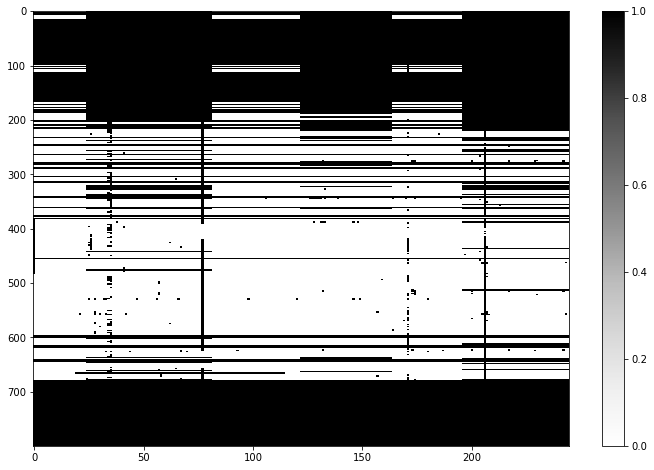

In [5]:
fig = plt.figure(figsize=(12,8))
im = plt.imshow(flags,aspect='auto',cmap='Greys',interpolation='nearest')
plt.colorbar(im)
args = locals()
curr_func = inspect.stack()[0][3]
utils.write_params_to_text(outfig,args,curr_func,curr_file,githash)

In [7]:
data_path = '/lustre/aoc/projects/hera/dstorer/H6C_data/2459855'
data_files = sorted(glob.glob(f'{data_path}/*sum.uvh5'))

In [ ]:
hd = io.HERADataFastReader(data_files)
data, _, _ = hd.read(read_flags=False, read_nsamples=False)